In [10]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [34]:
import tensorflow as tf

from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Set the image and batch sizes
image_size = (224, 224)
batch_size = 32

# Create an instance of the ResNet-50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [13]:
# Freeze the pre-trained weights
for layer in resnet_model.layers:
    layer.trainable = False

In [14]:
# Create a new model
model = Sequential([
    resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classifier with sigmoid activation
])

In [15]:
x_train = []
x_test = []
y_train = []
y_test = []

In [16]:
train_data_dir = '/Users/amanshastry/Desktop/Python/skin_cancer_detection/skin_cancer_data/train'
validation_data_dir = '/Users/amanshastry/Desktop/Python/skin_cancer_detection/skin_cancer_data/test'

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize pixel values between 0 and 1
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values between 0 and 1

In [18]:
# Load and preprocess the train images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Set the appropriate class_mode depending on your task
    subset='training'
)

# Load and preprocess the validation images
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Set the appropriate class_mode depending on your task
    subset='validation'
)

# Load and preprocess the test images
test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Set the appropriate class_mode depending on your task
)

Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs = 20
)

/Users/amanshastry/anaconda3/envs/skin_cancer_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 58s 857ms/step - accuracy: 0.5206 - loss: 2.2085 - val_accuracy: 0.5918 - val_loss: 0.6515
Epoch 2/20
 1/65 ━━━━━━━━━━━━━━━━━━━━ 45s 718ms/step - accuracy: 0.6875 - loss: 0.5586

/Users/amanshastry/anaconda3/envs/skin_cancer_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.6875 - loss: 0.5586 - val_accuracy: 0.5430 - val_loss: 1.2732
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 845ms/step - accuracy: 0.5500 - loss: 0.9593 - val_accuracy: 0.4609 - val_loss: 0.7404
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.4062 - loss: 0.7830 - val_accuracy: 0.4512 - val_loss: 0.7389
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 54s 830ms/step - accuracy: 0.5815 - loss: 0.6948 - val_accuracy: 0.6387 - val_loss: 0.5864
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.6562 - loss: 0.5913 - val_accuracy: 0.6680 - val_loss: 0.5614
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 53s 819ms/step - accuracy: 0.7065 - loss: 0.5784 - val_accuracy: 0.4883 - val_loss: 0.6505
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.5000 - loss: 0.5893 - val_accuracy: 0.7480 - val_loss: 0.5851
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 52s 800ms/step - accuracy: 0.6758 - loss: 0.6131 - val_accuracy: 0.687

In [21]:
model.save('model.h5')

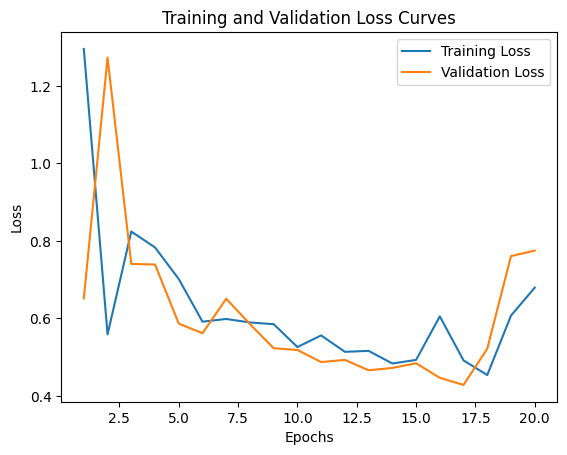

In [22]:
# Get the training and validation loss values from the history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Get the number of epochs
num_epochs = len(train_loss)

# Plot the training and validation loss curves
plt.plot(range(1, num_epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss, label='Validation Loss')

# Set the plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [24]:
loaded_model = tf.keras.models.load_model('/Users/amanshastry/Desktop/Python/skin_cancer_detection/model.h5')

In [25]:
# Get predictions on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Print the predicted labels
print("Predicted Labels:", predicted_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 697ms/step
Predicted Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
actual_labels = []

for sub_dir in os.listdir(validation_data_dir):
  try:
    sub_paths = os.listdir(f'{validation_data_dir}/{sub_dir}')

  except:
    sub_paths = []

  for img_path in sub_paths:
    if sub_dir == 'malignant':
      actual_labels.append(0)
    elif sub_dir == 'benign':
      actual_labels.append(1)

In [27]:
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)

print(f'Acuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

Acuracy: 0.44545454545454544
Precision: 0.4166666666666667
Recall: 0.041666666666666664
F1 score: 0.07575757575757576


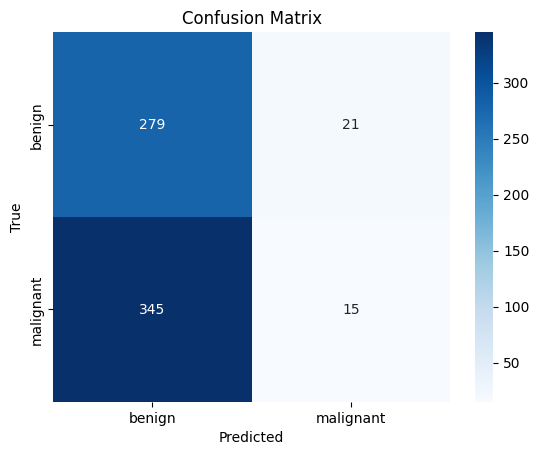

In [28]:
# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks to the heatmap
class_names = test_generator.class_indices
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

In [29]:
# Read images from the training folder
for class_folder in os.listdir(train_data_dir):
    class_folder_path = os.path.join(train_data_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            image = cv2.imread(image_path)
            x_train.append(image)

            if class_folder == 'malignant':
              y_train.append(0)
            elif class_folder == 'benign':
              y_train.append(1)

In [30]:
print(len(y_train))

2637


In [31]:
# Read images from the testing folder
for class_folder in os.listdir(validation_data_dir):
    class_folder_path = os.path.join(validation_data_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            image = cv2.imread(image_path)
            x_test.append(image)
            if class_folder == 'malignant':
              y_test.append(0)
            elif class_folder == 'benign':
              y_test.append(1)

In [32]:
print(len(y_test))

660


In [35]:
model = Sequential()
vgg = VGG16(include_top=False, weights = None, input_shape=(224, 224, 3))

In [36]:
model.add(vgg)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [37]:
optimizer = Adam(learning_rate=0.002)
loss = 'binary_crossentropy'
metrics = ['accuracy']

In [38]:
# Compile the model
model.compile(optimizer = 'adam', loss=loss, metrics=metrics)

x_train_np = np.array(x_train)
y_train_np = np.array(y_train)
x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

# Reshape the target labels
num_classes = 2
y_train_encoded = to_categorical(y_train_np, num_classes)
y_test_encoded = to_categorical(y_test_np, num_classes)

In [39]:
hist = model.fit(x_train_np, y_train_encoded, batch_size = 10, epochs = 40, validation_data = (x_test_np, y_test_encoded))

Epoch 1/40
  4/264 ━━━━━━━━━━━━━━━━━━━━ 9:48 2s/step - accuracy: 0.4583 - loss: 124.0774

KeyboardInterrupt: 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust size according to VGG model's input requirements
    batch_size = 50,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size = 50,
    class_mode='categorical'
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
model.compile(optimizer = optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/30
52/52 [==============================] - 43s 739ms/step - loss: 1.0353 - accuracy: 0.5474 - val_loss: 0.6892 - val_accuracy: 0.5462
Epoch 2/30
52/52 [==============================] - 39s 738ms/step - loss: 0.6898 - accuracy: 0.5446 - val_loss: 0.6895 - val_accuracy: 0.5431
Epoch 3/30
52/52 [==============================] - 40s 761ms/step - loss: 0.6893 - accuracy: 0.5470 - val_loss: 0.6887 - val_accuracy: 0.5477
Epoch 4/30
52/52 [==============================] - 40s 765ms/step - loss: 0.6892 - accuracy: 0.5477 - val_loss: 0.6889 - val_accuracy: 0.5477
Epoch 5/30
52/52 [==============================] - 38s 736ms/step - loss: 0.6891 - accuracy: 0.5462 - val_loss: 0.6885 - val_accuracy: 0.5492
Epoch 6/30
52/52 [==============================] - 38s 734ms/step - loss: 0.6894 - accuracy: 0.5443 - val_loss: 0.6892 - val_accuracy: 0.5446
Epoch 7/30
52/52 [==============================] - 40s 766ms/step - loss: 0.6905 - accuracy: 0.5354 - val_loss: 0.6912 - val_accuracy: 0.5492

KeyboardInterrupt: ignored

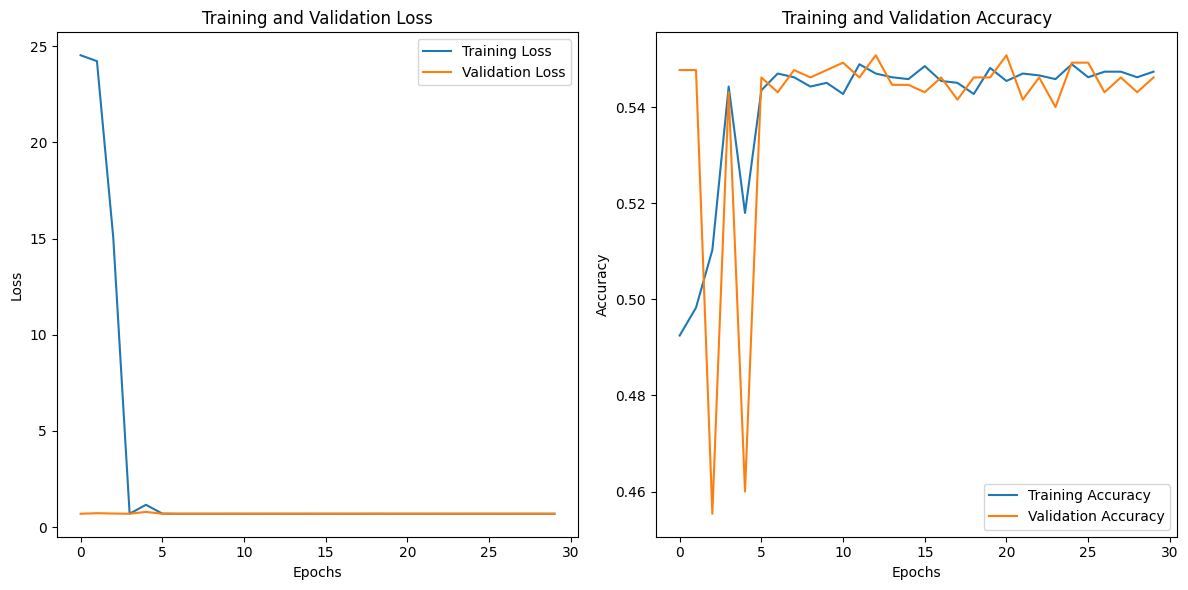

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Retrieve the training and validation accuracy values
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Plot the loss curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/cancer_model/model.h5')
# model.save_weights('/content/drive/MyDrive/cancer_model')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/cancer_model/model.h5')

In [ ]:
dir_names = os.listdir(validation_data_dir)

labels = []
images = []
results = []

# print(loaded_model.input_shape)

# Display the file names
for sub_dir in dir_names:
    files = os.listdir(f'{validation_data_dir}/{sub_dir}')
    for img_path in files:
      img = cv2.imread(f'{validation_data_dir}/{sub_dir}/{img_path}')
      updated_img = np.expand_dims(img, axis = 0)
      result = loaded_model.predict(updated_img)
      if sub_dir == 'malignant':
        labels.append(0)
      else:
        labels.append(1)
      results.append(result)

1/1 [==============================] - 0s 20ms/step


In [ ]:
res_labels = []
for probs in results:
  prob_list = probs.tolist()[0]
  res_labels.append(prob_list.index(max(prob_list)))

In [ ]:
accuracy = accuracy_score(labels, res_labels)
precision = precision_score(labels, res_labels)
recall = recall_score(labels, res_labels)
f1 = f1_score(labels, res_labels)

print(accuracy)
print(precision)
print(recall)
print(f1)

0.5454545454545454
0.5454545454545454
1.0
0.7058823529411764


In [ ]:
training_files = os.listdir(f'{train_data_dir}')

img_list = []
x_train = np.array([])
y_train = []

for sub_dir in training_files:
  for file_name in os.listdir(f'{train_data_dir}/{sub_dir}'):
    img = cv2.imread(f'{train_data_dir}/{sub_dir}/{file_name}')
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_list.append(grey_image)
    # 0 if image is benign, 1 if malignant
    y_train.append(0 if sub_dir == 'benign' else 1)

img_list = np.array(img_list)

In [ ]:
x_train = img_list.reshape(2637, (224*224))

df = pd.DataFrame(x_train)

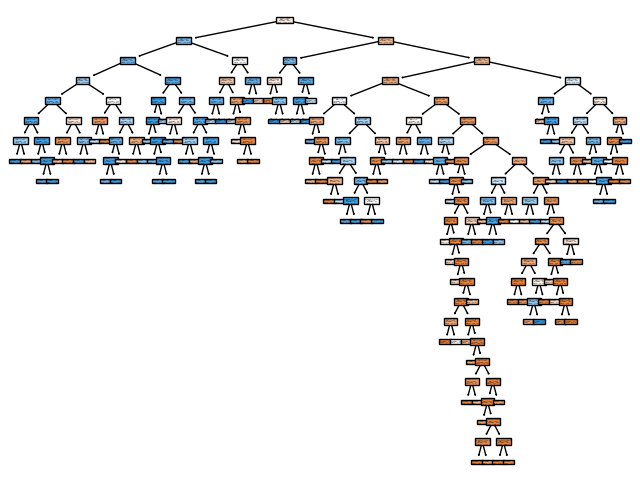

In [ ]:
# Create an instance of the decision tree classifier
clf = tree.DecisionTreeClassifier(min_samples_leaf = 10)

# Train the decision tree model
clf.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
importances = clf.feature_importances_
importances_list = importances.reshape(224, 224)

print(importances_list)

[[0.24839127 0.         0.         ... 0.         0.         0.05825461]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.05039108 0.         0.         ... 0.         0.         0.        ]]


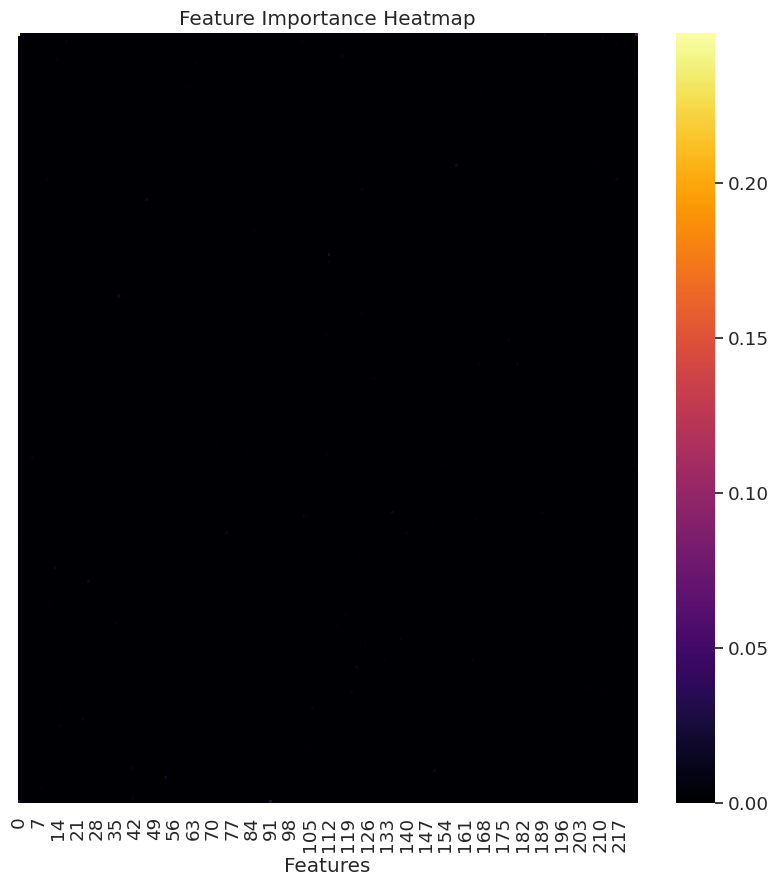

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(importances_list, cmap='inferno', annot = False, cbar=True, yticklabels=False)
plt.xlabel('Features')
plt.title('Feature Importance Heatmap')
plt.show()

In [ ]:
x_test = np.array([])
y_test = []
test_img_list = []

for sub_dir in os.listdir(validation_data_dir):
  for file_name in os.listdir(f'{validation_data_dir}/{sub_dir}'):
    img = cv2.imread(f'{validation_data_dir}/{sub_dir}/{file_name}')
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_img_list.append(grey_image)
    # 0 if image is benign, 1 if malignant
    y_test.append(0 if sub_dir == 'benign' else 1)

test_img_list = np.array(test_img_list)

In [ ]:
x_test = test_img_list.reshape(660, (224*224))

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
# f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Reall:", recall)
print("F1:", f1)

Accuracy: 0.7151515151515152
Precision: 0.6931034482758621
Reall: 0.67
F1: 0.6813559322033899


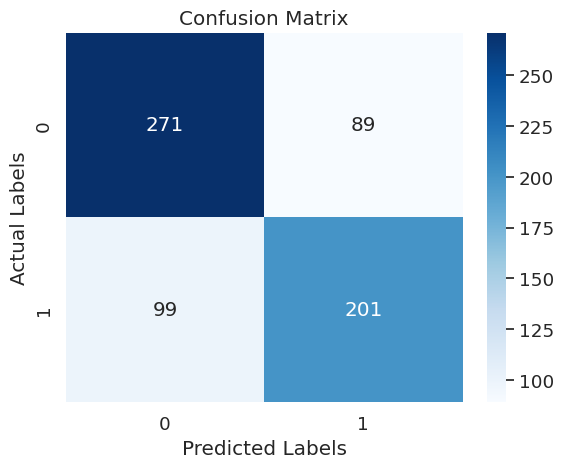

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                # feature_names = x_test,
                                class_names = ["0", "1"],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the visualization to a file
graph.view()  # Open the visualization in the default viewer

'decision_tree.pdf'